In [1]:
from src.sga import SGA
from src.fitnessfunction import ObjectiveSine, ObjectiveLinReg
from src.lin_reg import LinReg
import numpy as np
import matplotlib.pyplot as plot

## Sine fitness function

In [2]:
def plot_sin(population):
    # Sine wave
    x1 = np.arange(1, 128, 0.1)
    y1 = np.sin(x1)

    # Individuals
    x2 = [individual.value for individual in population.individuals]
    y2 = [individual.fitness for individual in population.individuals]

    plot.plot(x1, y1)
    plot.scatter(x2, y2)
    plot.show()

### Run simulation, maximize.

In [3]:
params_sine = {
    "objective_function": ObjectiveSine().get_fitness,
    "maximize": True,
    "pop_size": 100,
    "individual_size": 15,
    "max_generations": 5,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [4]:
sga = SGA(**params_sine)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.04459474062666316
Generation 1 avg. fitness: 0.7540599633299722
Generation 2 avg. fitness: 0.90899108709897
Generation 3 avg. fitness: 0.9453856866376142
Generation 4 avg. fitness: 0.9682488095570555
Generation 5 avg. fitness: 0.989679970732907
[1 1 0 0 1 1 0 0 0 0 1 1 0 1 0] 102.1015625 0.9999999802508747


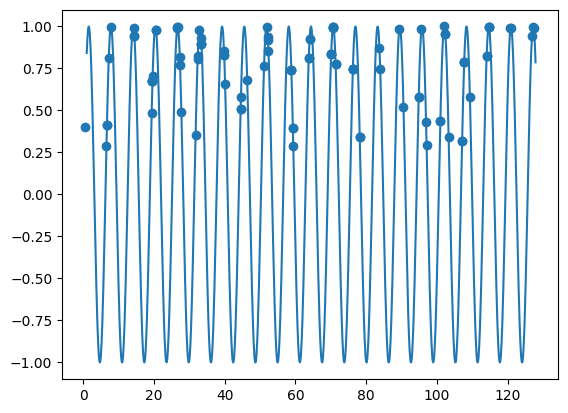

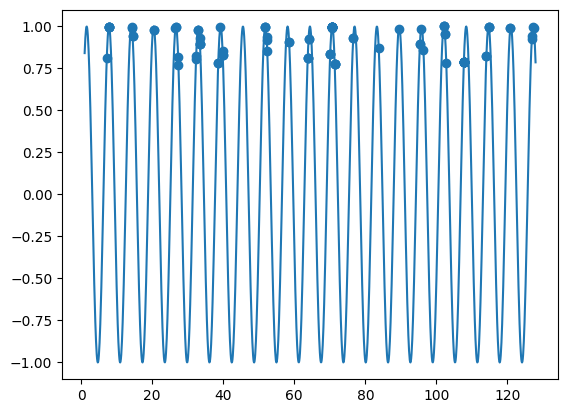

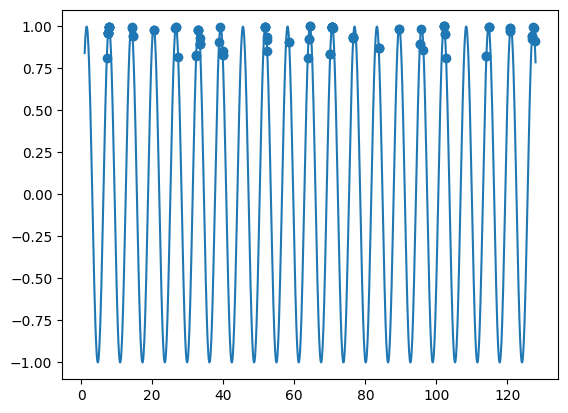

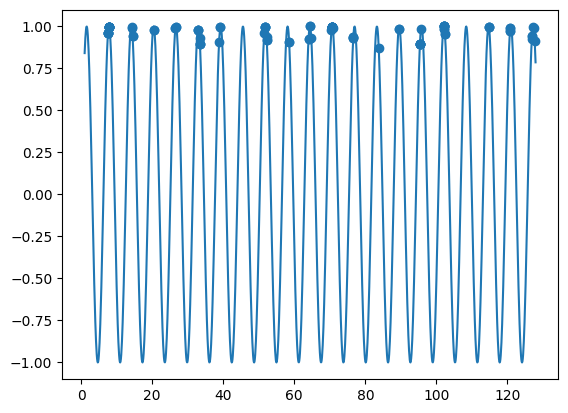

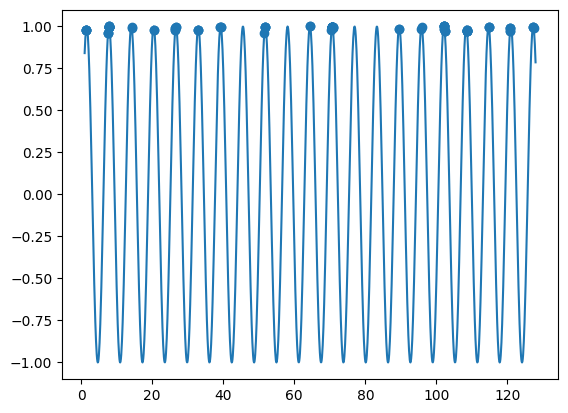

In [5]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

#### Run simulation with constraint

In [6]:
sga = SGA(**params_sine)
sga.simulate()
constraint = [5,10]
solution = sga.get_solution(constraint)

if solution is not None:
    print(solution.bitstring, solution.value, solution.fitness)
else:
    print("Could not find a solution that satisfies the constraint")

Generation 0 avg. fitness: -0.015468548320741949
Generation 1 avg. fitness: 0.5947402496579667
Generation 2 avg. fitness: 0.8195662948060837
Generation 3 avg. fitness: 0.9237891268603515
Generation 4 avg. fitness: 0.9697502630232916
Generation 5 avg. fitness: 0.9798979391020748
[0 0 0 0 0 0 1 1 0 0 1 0 1 1 1] 1.58984375 0.9998186033190141


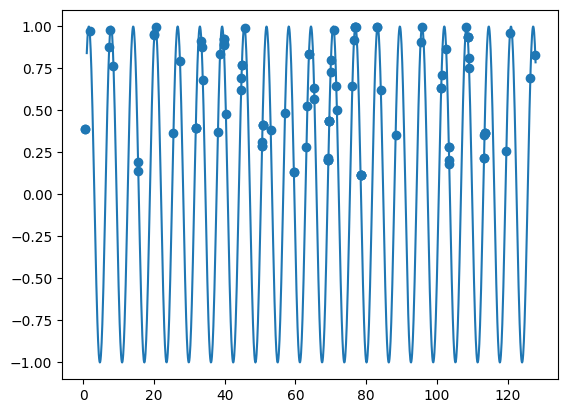

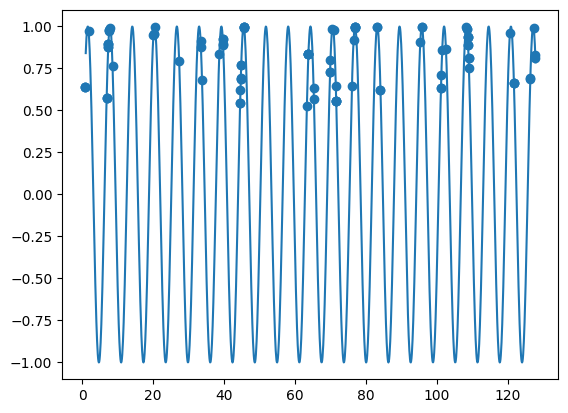

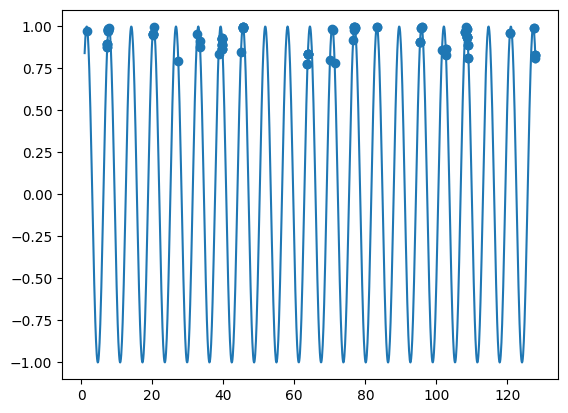

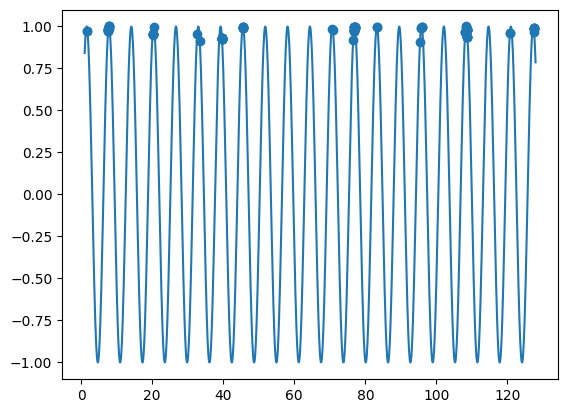

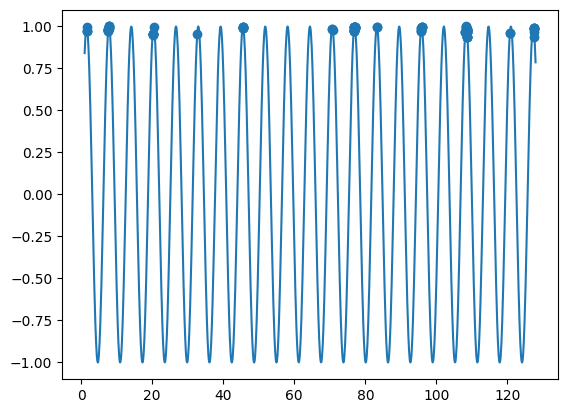

In [7]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

## Linear regression of dataset

In [8]:
# Load dataset
data_path = r"./data/dataset.txt"
df = np.genfromtxt(data_path, delimiter=",")
y = df[:, -1]
X = np.delete(df, -1, axis=1)

seed = 99
# seed = None

### Run the simulation, Minimize

In [9]:
# Run on entire dataset
linreg_err = LinReg().get_fitness(X, y, seed)
print(f"RMSE entire dataset: {linreg_err}")

RMSE entire dataset: 0.13530625063199608


In [10]:
params_linreg = {
    "objective_function": ObjectiveLinReg(X, y, seed=seed).get_fitness,
    "maximize": False,
    "pop_size": 250,
    "individual_size": X.shape[1],
    "max_generations": 30,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [12]:
sga = SGA(**params_linreg)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.13607356037357238
Generation 1 avg. fitness: 0.13363860122742235
Generation 2 avg. fitness: 0.13208021028126674
Generation 3 avg. fitness: 0.1306338659686672
Generation 4 avg. fitness: 0.1296303417904391
Generation 5 avg. fitness: 0.12870580362231177
Generation 6 avg. fitness: 0.12767097197532246
Generation 7 avg. fitness: 0.12680850400383606
Generation 8 avg. fitness: 0.1259449127731075
Generation 9 avg. fitness: 0.1252601970534289
Generation 10 avg. fitness: 0.12477988081643787
Generation 11 avg. fitness: 0.12426701163937007
Generation 12 avg. fitness: 0.12392758899928906
Generation 13 avg. fitness: 0.12343936278540898
Generation 14 avg. fitness: 0.12301987322179946
Generation 15 avg. fitness: 0.12261037929873832
Generation 16 avg. fitness: 0.1222349308011703
Generation 17 avg. fitness: 0.12206925985649011
Generation 18 avg. fitness: 0.1219737671727206
Generation 19 avg. fitness: 0.12187394581646123
Generation 20 avg. fitness: 0.1218175649865967
Generatio